# KNN

### IMPORTS

In [16]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn                        
import sklearn.datasets as ds           
import sklearn.model_selection as cv   
import sklearn.neighbors as nb 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### CARGAR LOS DATOS

In [2]:
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
print(X.shape)
print(y.shape)

(7375, 1477)
(7375, 1)


### DIVISION DE LOS DATOS

In [ ]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

### PRECISIONES

In [10]:
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbours:",  np.mean(cv_scores))

Accuracy 7 neighbours: 0.6141034291454874


In [11]:
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=X_train, y=y_train,  cv=10)  
print("Accuracy 7 neighbour: and distance weighting:", np.mean(cv_scores))

Accuracy 7 neighbour: and distance weighting: 0.6150724213935496


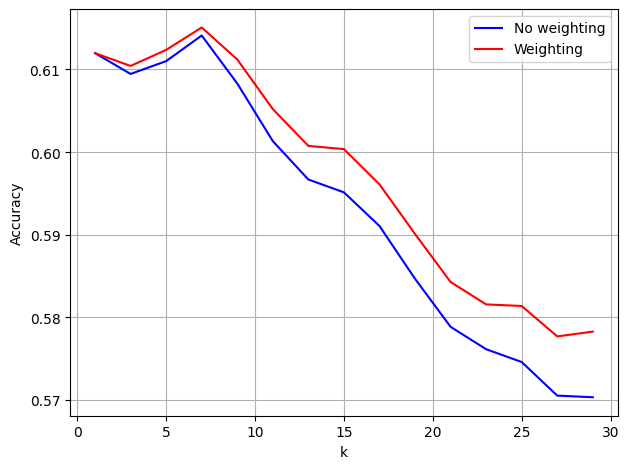

In [8]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 7, 'weights': 'distance'} Accuracy= 0.6150724213935496


### EVALUACIÓN DEL MODELO

0.6118391323994578
              precision    recall  f1-score   support

       mucho       0.63      0.41      0.50      1040
        poco       0.60      0.79      0.68      1173

    accuracy                           0.61      2213
   macro avg       0.62      0.60      0.59      2213
weighted avg       0.62      0.61      0.60      2213



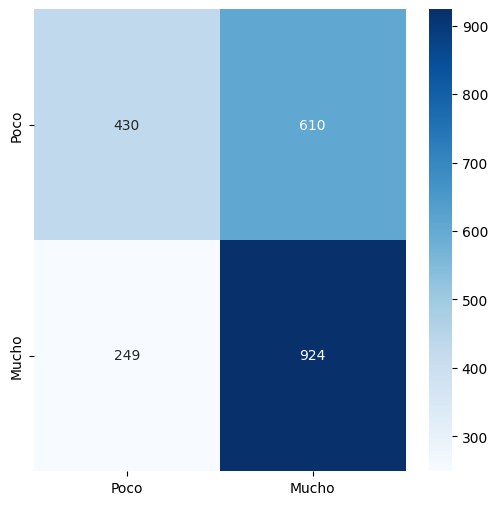

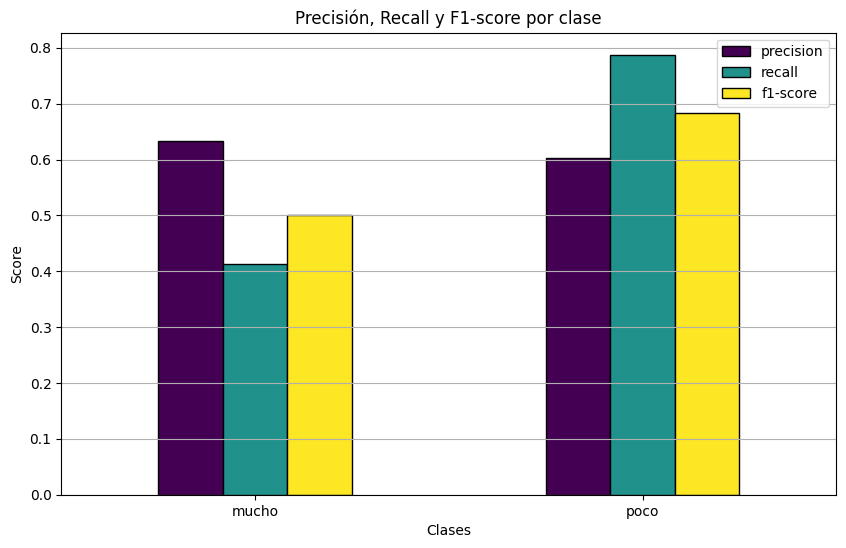

In [25]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
cm = (confusion_matrix(y_test, pred))
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Poco", "Mucho"], yticklabels=["Poco", "Mucho"])
plt.show()
# Reporte de clasificación
report = sklearn.metrics.classification_report(y_test, pred, output_dict=True)
# Visualización de métricas globales del reporte
metrics = ['precision', 'recall', 'f1-score']
report_df = pandas.DataFrame(report).T
report_df = report_df[metrics]
# Plot de métricas
report_df.iloc[:-3].plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title("Precisión, Recall y F1-score por clase")
plt.ylabel("Score")
plt.xlabel("Clases")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [18]:
# interval confidence
from statsmodels.stats.proportion import proportion_confint

epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
# or equivalent 
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.612 +/- 0.020


(0.5915351193338153, 0.6321431454651002)

In [14]:
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

(0.5912907789319177, 0.6319644178760672)